# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
## Download and upzip data set, only need to be done once
## download 
# curl -O https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip

## unzip
# upzip traffic-signs-data.zip

In [2]:
## Import relavent libariries
import pickle
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import time
import scipy.ndimage
import matplotlib.pyplot as plt
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
%matplotlib inline

In [3]:
## Load pickled data, read training, validating and testing data
training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Read signData
sign_file = 'signnames.csv'

with open(sign_file, mode = 'r') as f:
    signData = pd.read_csv(f)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### 1. 1 Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
## Examine basics of data set

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# Shape of an traffic sign image
image_shape = X_train.shape[1:3]

# Number unique classes/labels there are in the dataset.
n_classes = signData.shape[0]

# number for class, counts for training data'
trainClass, trainIdx, trainCounts = np.unique(y_train, return_index = True, return_counts = True)
valiClass, valiCounts = np.unique(y_valid, return_counts = True)
testClass, testCounts = np.unique(y_test, return_counts = True)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes in sign system =", n_classes)
print("Number of classes in training data =", trainClass.shape[0])
print("Number of classes in validating data =", valiClass.shape[0])
print("Number of classes in testing data =", testClass.shape[0])

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes in sign system = 43
Number of classes in training data = 43
Number of classes in validating data = 43
Number of classes in testing data = 43


### 1. 2 Include an exploratory visualization of the dataset
Visualize the German Traffic Signs Dataset using the pickled file(s).

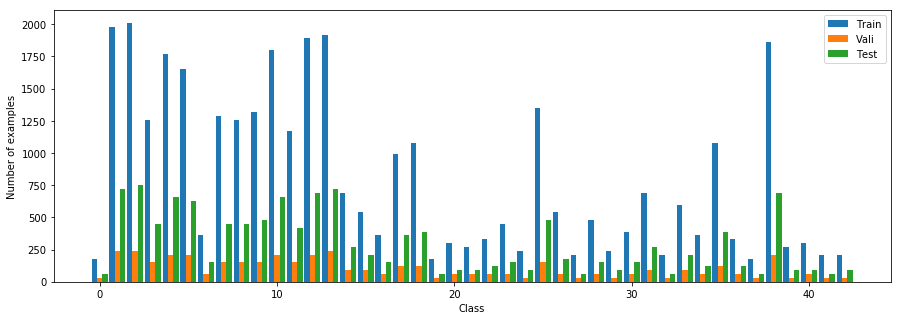

0                                  Speed limit (20km/h)
1                                  Speed limit (30km/h)
2                                  Speed limit (50km/h)
3                                  Speed limit (60km/h)
4                                  Speed limit (70km/h)
5                                  Speed limit (80km/h)
6                           End of speed limit (80km/h)
7                                 Speed limit (100km/h)
8                                 Speed limit (120km/h)
9                                            No passing
10         No passing for vehicles over 3.5 metric tons
11                Right-of-way at the next intersection
12                                        Priority road
13                                                Yield
14                                                 Stop
15                                          No vehicles
16             Vehicles over 3.5 metric tons prohibited
17                                             N

In [5]:
## Plot the distributions of classes in each data set
ax = plt.figure(figsize=(15,5))
barW = 0.3
plt.bar(trainClass - barW, trainCounts, width = barW, align = 'center')
plt.bar(valiClass, valiCounts, width = barW, align = 'center')
plt.bar(testClass + barW, testCounts, width = barW, align = 'center')
plt.xlabel('Class')
plt.ylabel('Number of examples')
plt.legend(['Train','Vali','Test'])
plt.show()
ax.savefig('examples/DataSetVisual.png')

print(signData['SignName'])

In [ ]:
## Plot individual examples in each class in training data
fig = plt.figure(figsize=(12,8))
for idxClass, count, idxStart in zip(trainClass,trainCounts,trainIdx):
    idxRnd = np.random.randint(idxStart, idxStart + count, 1)
    ax = fig.add_subplot(5, 10, idxClass+1)
    plt.imshow(X_train[idxRnd].squeeze())
plt.savefig('examples/DataSetExamples.png')

In [ ]:
## Plot randomly selected examples in each class in training data
def plotData(X,y,signData):
    Class, Idx, Counts = np.unique(y, return_index = True, return_counts = True)
    nDemo = 10
    for idxClass, count, idxStart in zip(Class,Counts,Idx):
        print('Class = ',idxClass,',',signData.SignName[idxClass], ',',count,' examples')
        fig = plt.figure(figsize=(nDemo,2))
        idxRnd = np.random.randint(idxStart, idxStart + count, nDemo)
        for j in range(1, nDemo):
            ax = fig.add_subplot(1, nDemo, j)
            ax.imshow(X[idxRnd[j]])
        plt.show()

plotData(X_train,y_train,signData)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. 

To meet specifications, the validation set accuracy will need to be at least 0.93.

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

References:
[LeCun](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf).

### 2. 1 Pre-process the Data Set
Pre-processing techniques used: Histogram equalization, grayscale, normalizatin

In [6]:
## Define parameters for pre-processing
opt = {'gamma': 1.5, 'gray': True}

In [7]:
## Define pipeline of pre-process data, followed with helper functions
def preProcess(X, y, opt):
    n = X.shape[0]
    dim = np.asarray(X.shape)
    gamma = opt['gamma']
    if opt['gray'] == True:
        dim[3] = 1
    X_pre = np.zeros(dim,dtype = np.float32)
    for i in range(0, n):
        xTemp = X[i]
        xTemp = gamma_correction(xTemp,gamma)
        xTemp = hist_equalization(xTemp)
        if opt['gray'] == True:
            xTemp = rgb2gray(xTemp)
        xTemp = scaleDown(xTemp)
        if opt['gray'] == True:
            X_pre[i] = xTemp[:,:,np.newaxis]
        else:
            X_pre[i] = xTemp        
    return X_pre, y

def scaleDown(img):
    return np.float32(img/255)
#     return np.float32((img - 128)/128)

def scaleUp(img):
    return np.uint8(img*255)
#     return np.uint8(img*128 + 128)

def gamma_correction(img,gamma):
    img = img/255
    img = cv2.pow(img,1/gamma)
    return np.uint8(img*255)

def hist_equalization(img):
    # hist equal in YUV space
    imgYUV = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    # equalize the histogram of the Y channel
    imgYUV[:,:,0] = cv2.equalizeHist(imgYUV[:,:,0])
    # convert the YUV image back to RGB format
    imgOut = cv2.cvtColor(imgYUV, cv2.COLOR_YUV2RGB)
    return imgOut

def rgb2gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def rgb2yuv(img):
    return cv2.cvtColor(img,cv2.COLOR_RGB2YUV)


In [8]:
## Examine the pre-processed data
def plotDataPre(X, X_pre, y, signData, opt):
    Class, Idx, Counts = np.unique(y, return_index = True, return_counts = True)
    nDemo = 10
    for idxClass, count, idxStart in zip(Class,Counts,Idx):
        print('Class = ',idxClass,',',signData.SignName[idxClass], ',',count,' examples')
        fig = plt.figure(figsize=(nDemo,2))
        idxRnd = np.random.randint(idxStart, idxStart + count, nDemo)
        for j in range(1, nDemo):
            ax = fig.add_subplot(2, nDemo, j)
            ax.title.set_text(str(idxRnd[j]))  
            ax.imshow(X[idxRnd[j]])
            ax = fig.add_subplot(2, nDemo, j + nDemo)
            if opt['gray'] == True:
                ax.imshow(X_pre[idxRnd[j]].squeeze(), cmap = 'gray')
            else:
                ax.imshow(X_pre[idxRnd[j]])
        plt.show()
        
def plotDemoPre(x,idx):
    plt.figure(figsize=(8,2));
    plt.subplot(141); plt.imshow(x.squeeze());
    plt.title('Original ' + str(idx))
    xTemp = gamma_correction(x,2)
    plt.subplot(142); plt.imshow(xTemp)
    plt.title('Gamma correction')
    xTemp = hist_equalization(xTemp)
    plt.subplot(143); plt.imshow(xTemp)
    plt.title('Histogram equal')
    xTemp = rgb2gray(xTemp)
    plt.subplot(144); plt.imshow(xTemp, cmap = 'gray')
    plt.title('Grayscale')
    title = 'examples/preProcessEx' + str(idx) +'.png'
    plt.savefig(title)


In [9]:
## Pre-process traing, validating and testing data set
X_train_pre, y_train_pre = preProcess(X_train, y_train, opt)
X_valid_pre, y_valid_pre = preProcess(X_valid, y_valid, opt)
X_test_pre, y_test_pre = preProcess(X_test, y_test, opt)

X_train_pre.astype(np.float32);
X_valid_pre.astype(np.float32);
X_test_pre.astype(np.float32);

In [ ]:
## Plot individual demo of pre-processing
# idxTest = [7774,7991,8109,8150]
idxTest = [8109,8150]

for i in range(len(idxTest)):
    plotDemoPre(X_train[idxTest[i]],idxTest[i])

In [ ]:
## Examine all pre-processed training data
plotDataPre(X_train, X_train_pre, y_train, signData, opt)

In [ ]:
## Examine all pre-processed validation data
plotDataPre(X_valid, X_valid_pre, y_valid, signData, opt)

### 2.2 Augment data
More data are adding by rotating the signs to balance the distribution of class of signs

In [10]:
## Define parameters
optAug = {'angMax':15, 'angMin':-15}

In [11]:
## Define data augmentation method, followed by helper functions for augmenting data
def AugmentData(X,y,optAug):
    nClass, nIdx, nCounts = np.unique(y, return_index = True, return_counts = True)
    compRatio = (max(nCounts) / nCounts - 1)
    compRatio = compRatio.astype(np.int)
    addCounts = nCounts * compRatio

    dimX = np.asarray(X.shape)
    dimY = np.asarray(y.shape)

    for i in range(len(addCounts)):
        idxS = nIdx[i]
        idxE = nIdx[i] + nCounts[i]
            
        if addCounts[i] != 0:
            dimX[0] = addCounts[i]
            dimY[0] = addCounts[i]
            X_temp = np.zeros(dimX, dtype = np.float32)
            y_temp = np.zeros(dimY, dtype = np.uint8)
            idxAug = np.random.randint(idxS, idxE, size = addCounts[i])
            thetaAug = np.random.randint(optAug['angMin'], optAug['angMax'], size = addCounts[i])
            for j in range(idxAug.shape[0]):
                X_temp[j,:,:,:] = augRotate(X[idxAug[j]], thetaAug[j])
                y_temp[j] = y[idxAug[j]]
            X_aug_temp = np.append(X[idxS:idxE], X_temp, axis = 0)
            y_aug_temp = np.append(y[idxS:idxE], y_temp, axis = 0)

            if i == 0:
                X_aug = X_aug_temp
                y_aug = y_aug_temp
            else:
                X_aug = np.append(X_aug, X_aug_temp, axis = 0)
                y_aug = np.append(y_aug, y_aug_temp, axis = 0)
        else:
            if i == 0:
                X_aug = X[idxS:idxE]
                y_aug = y[idxS:idxE]
            else:
                X_aug = np.append(X_aug, X[idxS:idxE], axis = 0)
                y_aug = np.append(y_aug, y[idxS:idxE], axis = 0)

    print('Number of examples before augmentation: ' + str(X.shape[0]))
    print('Number of examples after augmentation: ' + str(X_aug.shape[0]))
    return X_aug, y_aug

def augRotate(x, theta):
    xNew = scipy.ndimage.rotate(x, theta, reshape=False)
    return xNew

def augShift(x, shift):
    xNew = scipy.ndimage.shift(x, shift)
    return xNew

In [12]:
## Define plot function
def plotDistAug(y, y_aug, label):
    augClass, augIdx, augCounts = np.unique(y_aug, return_index = True, return_counts = True)
    oriClass, oriIdx, oriCounts = np.unique(y, return_index = True, return_counts = True)
    
    ax = plt.figure(figsize=(15,5))
    barW = 0.4
    plt.bar(oriClass - barW, oriCounts, width = barW, align = 'center')
    plt.bar(augClass, augCounts, width = barW, align = 'center')
    plt.xlabel('Class')
    plt.ylabel('Number of ' + label + ' examples')
    plt.legend(['Original ' + label + ' set','Augmented ' + label + ' set'])
    plt.show()
    
def plotDataAug(X,y,signData):
    Class, Idx, Counts = np.unique(y, return_index = True, return_counts = True)
    nDemo = 10
    for idxClass, count, idxStart in zip(Class,Counts,Idx):
        print('Class = ',idxClass,',',signData.SignName[idxClass], ',',count,' examples')
        fig = plt.figure(figsize=(nDemo,2))
        idxRnd = np.random.randint(idxStart, idxStart + count, nDemo)
        for j in range(1, nDemo):
            ax = fig.add_subplot(1, nDemo, j)
            ax.imshow(X[idxRnd[j]].squeeze(), cmap = 'gray')
        plt.show()

def plotDemoAug(x,idx):
    x = scaleUp(x)
    xAug = augRotate(x[0],10)   
    plt.figure(figsize=(4,2));
    plt.subplot(121); plt.imshow(x.squeeze(),cmap = 'gray');
    plt.title('Pre-processed ' + str(idx))
    plt.subplot(122); plt.imshow(xAug.squeeze(),cmap = 'gray');
    plt.title('Augmented' + str(idx))
    title = 'examples/AugmentedEx' + str(idx) +'.png'
    plt.savefig(title)

In [13]:
## Generating additional data
print('For training set')
X_train_aug, y_train_aug = AugmentData(X_train_pre, y_train_pre, optAug)
print('For validation set')
X_valid_aug, y_valid_aug = AugmentData(X_valid_pre, y_valid_pre, optAug)

For training set
Number of examples before augmentation: 34799
Number of examples after augmentation: 74217
For validation set
Number of examples before augmentation: 4410
Number of examples after augmentation: 9390


In [ ]:
## Plot augmented data distributions
plotDistAug(y_train, y_train_aug, 'training')
plotDistAug(y_valid, y_valid_aug, 'validation')

In [ ]:
## Plot augmented training data
plotDataAug(X_train_aug, y_train_aug, signData)

In [ ]:
## Plot augmented validation data
plotDataAug(X_valid_aug, y_valid_aug, signData)

In [ ]:
## Plot demo of augmented data
idxAugDemo = [7991]
plotDemoAug(X_train_pre[idxAugDemo],idxAugDemo)

### 2. 2 Model Architecture

In [14]:
## Define model parameters
optCNN = {'initMu': 0, 'initStd': 0.1}

In [15]:
## Define each individual layer
def convLayer(x, fSize, stride, inDepth, outDepth, optCNN):
    conW = tf.Variable(tf.truncated_normal(shape = (fSize, fSize, inDepth, outDepth), 
                                            mean = optCNN['initMu'], stddev = optCNN['initStd']))
    conB = tf.Variable(tf.zeros(outDepth))
    con = tf.nn.conv2d(x, conW, strides = [stride, stride, stride, stride],
                      padding = 'VALID') + conB
    con = tf.nn.relu(con)
    return con

def maxPool(x, fSize):
    return tf.nn.max_pool(x, ksize = [1, fSize, fSize, 1], strides = [1, fSize, fSize, 1],
                         padding = 'VALID')

def fullCon(x, inDim, outDim, optCNN):
    W = tf.Variable(tf.truncated_normal(shape = (inDim, outDim), mean = optCNN['initMu'], 
                                       stddev = optCNN['initStd']))
    B = tf.Variable(tf.zeros(outDim))
    y = tf.matmul(x, W) + B
    y = tf.nn.relu(y)
    return y

In [16]:
## Construct full model

# # 20 epoch, original training data, 93%
def fullModel(x, optCNN):
    # input dimension = [32, 32, 1]    
    convL1 = convLayer(x, 5, 1, 1, 60, optCNN)
    # output dimension = [28, 28, 100]
    
    maxPool1 = maxPool(convL1, 2)
    # output dimension = [14, 14, 100]
    
    convL2 = convLayer(maxPool1, 5, 1, 60, 120, optCNN)
    # output dimension = [10, 10, 150]
    
    maxPool2 = maxPool(convL2, 2)
    # output dimension = [5, 5, 150]
    
    convL3 = convLayer(maxPool2, 3, 1, 120, 200, optCNN)
    # output dimension = [3, 3, 250]
    
#     maxPool3 = maxPool(convL3, 2)
    # output dimension = [, , 250]
    
    fCon1 = flatten(convL3)
    fCon1 = tf.nn.dropout(fCon1, keep_prob)
    # output dimension = 3*3*150
    
    fCon2 = fullCon(fCon1, 3*3*200, 300, optCNN)
    # output dimension = 300
        
    logits = fullCon(fCon2, 300, 43, optCNN)
    # output dimension = 43
    
    return logits

### 2.4 Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
## Define training parameters
optMod = {'epochs': 1, 'batchSize': 128, 'learnRate':0.0005,
         'keepRate':0.5, 'dataChoice': 'pre'}

if optMod['dataChoice'] == 'aug':
    X_train_mod = X_train_aug
    y_train_mod = y_train_aug
    X_valid_mod = X_valid_aug
    y_valid_mod = y_valid_aug
elif optMod['dataChoice'] == 'pre':
    X_train_mod = X_train_pre
    y_train_mod = y_train_pre
    X_valid_mod = X_valid_pre
    y_valid_mod = y_valid_pre

In [18]:
## Set up tensor flow training session
# Set up place holder for input data
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.uint8, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

logits = fullModel(x, optCNN)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = optMod['learnRate'])
training_operation = optimizer.minimize(loss_operation)

In [19]:
## Set up tensor flow session to evaluate accuracy and loss
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, keepRate):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
#     sess = tf.get_default_session()
    for offset in range(0, num_examples, optMod['batchSize']):
        batch_x, batch_y = X_data[offset:offset+optMod['batchSize']], y_data[offset:offset+optMod['batchSize']]
        [accuracy, loss] = sess.run([accuracy_operation, loss_operation], 
                                    feed_dict={x: batch_x, y: batch_y, keep_prob: keepRate})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return (total_accuracy / num_examples, total_loss / num_examples)

In [20]:
# Plots history of learning curves for a specific model.
def plot_learning_curves(train_loss, valid_loss, train_acc, valid_acc):
    """
    Plots learning curves (loss and accuracy on both training and validation sets).
    """
    epoch = range(1, int(train_loss.shape[0])+1)
    curves_figure = plt.figure(figsize = (10, 4))
    axis = curves_figure.add_subplot(1, 2, 1)
    axis.plot(epoch,train_acc*100)
    axis.plot(epoch,valid_acc*100)
    axis.legend(['train','valid'])

    plt.grid()
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.ylim(50, 110.)
#     plt.xlim(0, epoch)

    axis = curves_figure.add_subplot(1, 2, 2)
    axis.plot(epoch,train_loss)
    axis.plot(epoch,valid_loss)
    axis.legend(['train','valid'])

    plt.grid()
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.ylim(0.001, 1) 
#     plt.xlim(0, epoch)
#     plt.yscale("log")

In [21]:
## Train model and compute training and cross-validation error
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = X_train_mod.shape[0]
    
    train_loss_history = np.empty([0], dtype = np.float32)
    train_accuracy_history = np.empty([0], dtype = np.float32)
    valid_loss_history = np.empty([0], dtype = np.float32)
    valid_accuracy_history = np.empty([0], dtype = np.float32)
    
    print("Training...")
    print()
    for i in range(optMod['epochs']):
        timeStart = time.time()
        X_train_rand, y_train_rand = shuffle(X_train_mod, y_train_mod)

        for offset in range(0, num_examples, optMod['batchSize']):
            end = offset + optMod['batchSize']
            batch_x, batch_y = X_train_rand[offset:end], y_train_rand[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: optMod['keepRate']})
        
        [train_accuracy, train_loss] = evaluate(X_train_mod, y_train_mod, 1)
        [valid_accuracy, valid_loss] = evaluate(X_valid_mod, y_valid_mod, 1)
        
        valid_loss_history = np.append(valid_loss_history, [valid_loss])
        valid_accuracy_history = np.append(valid_accuracy_history, [valid_accuracy])
        train_loss_history = np.append(train_loss_history, [train_loss])
        train_accuracy_history = np.append(train_accuracy_history, [train_accuracy])
        
        timeElapsed = time.time() - timeStart
        print("EPOCH %.0f, time used = %.1f sec" % (i+1, timeElapsed))
        print("Training accuracy = %.1f%%, training loss = %.3f" % (100*train_accuracy, train_loss))
        print("Validation accuracy = %.1f%%, validation loss = %.3f" % (100*valid_accuracy, valid_loss))
        print()
        
    saver.save(sess, './TrafficSignModel')
    print("Model saved")

Training...

EPOCH 1, time used = 362.2 sec
Training accuracy = 78.5%, training loss = 0.906
Validation accuracy = 73.0%, validation loss = 1.117

Model saved


/Users/yichen/anaconda/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


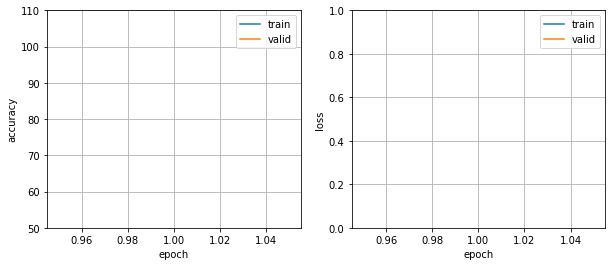

In [29]:
## Monitoring training and validation accuracy
plot_learning_curves(train_loss_history, valid_loss_history, train_accuracy_history, valid_accuracy_history)

In [30]:
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    [test_accuracy, test_loss] = evaluate(X_test_pre, y_test_pre, 1)
    print("Testing accuracy = %.1f%%, testing loss = %.3f" % (100*test_accuracy, test_loss))

TypeError: unhashable type: 'numpy.ndarray'

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [25]:
lists

['.DS_Store',
 '00000.ppm',
 '00001.ppm',
 '00003.ppm',
 '00004.ppm',
 '00005.ppm',
 '00006.ppm',
 '00007.ppm',
 '00008.ppm',
 '00009.ppm']

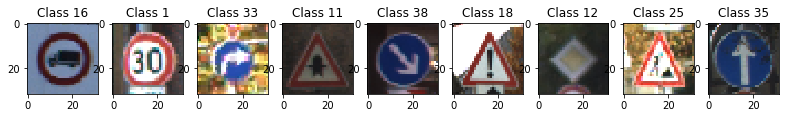

In [27]:
## Load the images and plot them here.
import os
import PIL
from PIL import Image
lists = os.listdir("newTest/")

y_new = np.asarray([16,1,33,11,38,18,12,25,35], dtype=np.uint8)
X_new = np.empty([0, 32, 32, 3], dtype = np.uint8)
i = 0
plt.figure(figsize=(15,3))
for list in lists[1:end]:
    image = Image.open('newTest/' + list)
    plt.subplot(1,10,i+1)
    image = image.resize((32,32))
    plt.imshow(image)
    x = np.asarray(image, dtype=np.uint8)
    plt.title('Class ' + str(y_new[i]))
    x = x[np.newaxis]
    X_new = np.append(X_new, x, axis = 0)
    i = i + 1

### Predict the Sign Type for New Images and Analyze Performance

In [31]:
## Run the predictions here and use the model to output the prediction for each image.
X_new_pre, y_new_pre = preProcess(X_new, y_new, opt)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    [testNew_accuracy, testNew_loss] = evaluate(X_new_pre, y_new_pre, 1)
    print("New festing accuracy = %.1f%%, testing loss = %.3f" % (100*testNew_accuracy, testNew_loss))

TypeError: unhashable type: 'numpy.ndarray'

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

In [ ]:
## Define helper function to print out the top ten softmax probabilities for the new test images
def plotDemoTopK(X, y, probTopK, idxTopK, nCase):
    
    fig = plt.figure(figsize=(14,22))
    fig.subplots_adjust(hspace= 0, wspace = 1)

    for i in range(nCase):
        ax = fig.add_subplot(3,3,i+1)
        ax.imshow(X[i])
        label = topKLabel(y[i], probTopK[i],idxTopK[i])
        plt.xlabel(label,fontsize = 12)
        plt.show
        plt.savefig('examples/ClassifyExamples.png')

def topKPredict(X, k_top):
    sess = tf.get_default_session()
    probMatrix = sess.run(tf.nn.softmax(logits), feed_dict = {x: X, keep_prob: 1.0})
    topK = tf.nn.top_k(probMatrix, k = k_top)
    return sess.run(topK)

def topKLabel(idxCorr,prob, idx):
    s1 = str('Correct label is ' + signData['SignName'][idxCorr] + '\n')
    for j in range(len(prob)):
        s2 = (str(round(prob[j]*100,2)) + ' % being ' + signData['SignName'][idx[j]] + '\n')
        s1 = s1+s2
    return s1

In [ ]:
nTopClass = 5

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    topK = topKPredict(X_new_pre, nTopClass)
    
    plotDemoTopK(X_new,y_new,topK.values, topK.indices, len(y_new))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")